In [31]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('heart_Disease.csv')


First, check if there are any NA values present in the data. If NA values are found, replace them with the mean for numerical columns and the mode for categorical columns, based on the data type.

In [39]:
df = pd.read_csv('heart_Disease.csv')
for column in df.columns:
    if df[column].isna().any() and np.issubdtype(df[column].dtype, np.number):
        df[column] = df[column].fillna(df[column].mean().round(4))
    elif df[column].isna().any() and df[column].dtype=='object':
        df[column] = df[column].fillna(df[column].mode()[0])
df.to_csv('updated_file.csv', index=False)

In [43]:
uf = pd.read_csv('updated_file.csv')
uf.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [48]:
x = uf.drop(['HeartDisease'], axis = 1)
y = uf['HeartDisease']

In [49]:
x = x.to_numpy()
y = y.to_numpy()
print("Shape of X: ", x.shape)
print("Shape of Y: ", y.shape)

Shape of X:  (4238, 15)
Shape of Y:  (4238,)


In [57]:
train = int(0.7*4238)
test = int(0.15*4238)
val = 4238 - train - test 

x_train = x[0:train]
y_train = y[0:train]

test_x = x[train:test+train]
test_y = y[train:test+train]

val_x = x[train+test:]
val_y = y[train+test:]



In [60]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1 / (1+ np.exp(-z))
    ### END SOLUTION ###  
    
    return g

In [78]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    total_cost = 0
    
    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)
        total_cost += (-y[i]*np.log(g)) - (1-y[i])*np.log(1-g)
        
    total_cost = total_cost / m
        
        
    ### END CODE HERE ### 

    return total_cost

In [64]:
m, n = x_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))
print(m,n)

Cost at initial w (zeros): 0.693
2966 15


In [65]:
def compute_gradient_function(X,y, w, b):
    m, n = X.shape
    d_b = 0
    d_w = np.zeros(n)
    for i in range(m):
        d_w = np.dot(X[i], w) + b
        sig_w = sigmoid(d_w)
        for j in range(n):
            dw_sig = (sig_w-y[i])*X[i][j]
            d_w = dw_sig+d_w
        d_b = (sig_w-y[i]) + d_b
    d_b = d_b/m
    d_w = d_w/m
    return d_b, d_w
       

In [66]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient_function(x_train, y_train, initial_w, initial_b)
print(f'd_b at initial w (zeros):{dj_db}' )
print(f'd_w at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.3465947403910991
dj_dw at initial w (zeros):0.1078068105192178


In [86]:
def predict(X, weights, bias):
    probabilities = sigmoid(np.dot(X, weights) + bias)
    return (probabilities >= 0.5).astype(int)

def calculate_accuracy(predictions, y_true):
    return np.mean(predictions == y_true)

In [97]:
import math

def gradient_descent_function(X, y, val_x, val_y,initial_weights, initial_bias, compute_cost, compute_gradients, learning_rate, num_iterations, regularization_param):
    # Number of training examples
    num_samples = len(X)
    
    # Lists to store cost and weights at each iteration
    cost_history = []
    weights_history = []
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Initialize weights and bias
    weights = initial_weights
    bias = initial_bias

    # Iterate through the number of iterations
    for iteration in range(num_iterations):
        # Compute the gradients
        gradient_bias, gradient_weights = compute_gradients(X, y, weights, bias)

        # Update parameters
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(x_train, y_train, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(x_train, weights, bias)
        val_predictions = predict(val_x, weights, bias)
        train_accuracy = calculate_accuracy(train_predictions, y_train)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        # Compute and store the cost
        if iteration < 100000:  # Prevent excessive resource usage
            cost = compute_cost(X, y, weights, bias, regularization_param)
            cost_history.append(cost)

        # Print the cost and weights at intervals
        if iteration % math.ceil(num_iterations / 10) == 0 or iteration == (num_iterations - 1):
            weights_history.append(weights)
            print(f"Iteration {iteration:4}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")
    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history


In [98]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 1000
alpha = 0.001

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function(x_train ,y_train, val_x, val_y,initial_w, initial_b, 
                                   compute_cost, compute_gradient_function, alpha, iterations, 0)


Iteration    0: Train Cost 0.8164, Val Cost 0.8253, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  100: Train Cost 0.8022, Val Cost 0.8109, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  200: Train Cost 0.7891, Val Cost 0.7976, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  300: Train Cost 0.7770, Val Cost 0.7853, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  400: Train Cost 0.7660, Val Cost 0.7741, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  500: Train Cost 0.7560, Val Cost 0.7639, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  600: Train Cost 0.7469, Val Cost 0.7547, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  700: Train Cost 0.7386, Val Cost 0.7463, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  800: Train Cost 0.7312, Val Cost 0.7388, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  900: Train Cost 0.7246, Val Cost 0.7321, Train Accuracy 0.8466, Val Accuracy 0.8446
Iteration  999: Train Cost 0.7188, Val Cost 0.7261

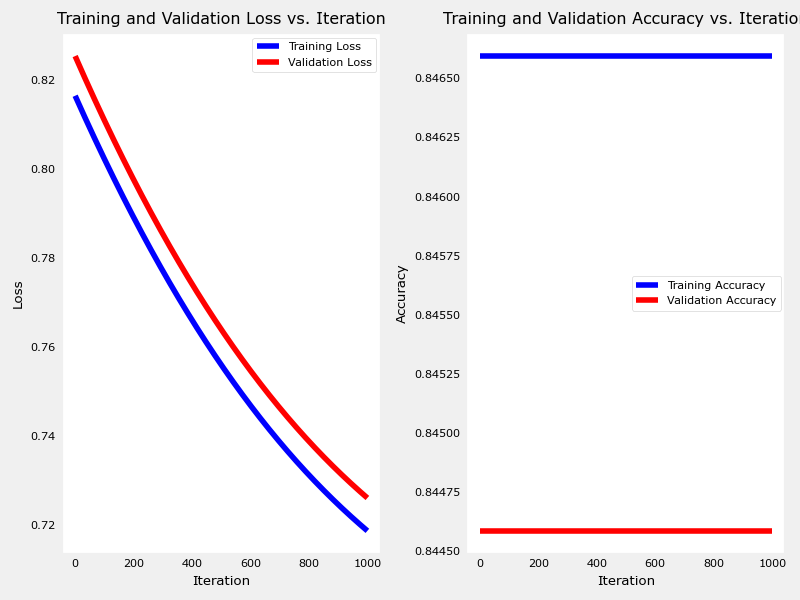

In [101]:
plt.figure(figsize=(8, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_histroy, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()